<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK5_%ED%95%84%EC%82%AC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [내용 정리]

## 분류(Classification)의 개요

나이브 베이즈: 베이즈 통계와 생성 모델 기반.

로지스틱 회귀: 독립변수와 종속변수의 선형 관계성 기반.

결정 트리: 데이터 균일도에 따른 규칙 기반.

서포트 벡터 머신: 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌.

최소 근접 알고리즘: 근접 거리를 기준으로 함.

신경망: 심층 연결 기반.

**앙상블**: 서로 다른(또는 같은) 머신러닝 알고리즘을 결합함.
- 배깅(Bagging): 랜덤 포레스트(Random Forest)
- **부스팅(Boosting)**: 그래디언트 부스팅(Gradient Boosting), XgBoost, LightGBM
- 기본 알고리즘은 **결정 트리**.

**결정 트리**
- 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 적음.
- 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가지며, 과적합이 발생해 성능이 저하될 수 있음.

-> 앙상블 기법에서는 장점으로 작용.
- 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하며 예측 성능을 향상시킴. 이때 결정 트리가 약한 학습기가 됨.

## 결정 트리

데이터 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것.

**어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가**가 알고리즘의 성능을 크게 좌우함.

루트 노드

**규칙 노드**(Decision Node): 규칙 조건. 데이터 세트의 피처가 결합해 규칙 조건을 만들 때마다 형성됨.

**리프 노드**(Leaf Node): 결정된 클래스 값.

- 새로운 규칙 조건마다 **서브 트리/브랜치**(Sub Tree) 생성.
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높아짐. -> **가능한 한 적은 결정 노드**로 높은 예측 정확도를 갖기 위해서는 트리를 어떻게 **분할**(Split)할 것인가가 중요함.

**결정 노드**는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 생성. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 생성, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개를 방식을 자식 트리로 내려가면서 반복.
- **정보 이득**(Information Gain): **1-엔트로피지수** 정보 이득이 높을수록 균일도 높음.
- **지니 계수**: 지니 계수가 낮을수록 균일도 높음. **DecisionTreeClassifier**가 지니 계수를 이용해 데이터 세트 분할.

## 결정 트리 모델의 특징

장점: 쉽다, 직관적이다, 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다

단점: 과적합으로 알고리즘 성능이 떨어진다 (**트리의 크기를 사전에 제한**하는 튜닝이 필요하다)

## 결정 트리 파라미터

**DecisionTreeClassifier**(분류), **DecisionTreeRegressor**(회귀) 제공
- 결정 트리 구현: CART(Classification And Regression Trees)

**파라미터**
- min_samples_split: 노드 분할을 위한 최소한의 샘플 데이터 수. 과적합 제어. defalt=2
- min_samples_leaf: 분할될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수. 과적합 제어. *비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정해야 함.*
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수. defalt=None.(데이터 세트의 모든 피처를 사용해 분할 수행.) *int*형 지정 시 대상 피처 개수, *float*형으로 지정 시 전체 피처 중 대상 피처의 퍼센트. *sqrt(=auto), log, None* 등이 있음.
- max_depth: 트리의 최대 깊이를 규정. defalt=None.(깊이를 계속 키우며 분할 또는 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 증가.) 깊이가 깊어질 시 과적합.
- max_leaf_nodes: 말단 노드의 최대 개수.

## 결정 트리 모델의 시각화

리프 노드: 더 이상 자식 노드가 없는 노드. 최종 클래스 값이 결정되는 노드. - 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족해야 함.

브랜치 노드: 자식 노드가 있는 노드. 자식 노드를 만들기 위한 분할 규칙 조건을 가짐.
- 피처의 조건이 있는 것: 자식 노드를 만들기 위한 규칙 조건. 조건이 없을 시 리프 노드.
- gini: value=[]로 주어진 데이터 분포에서의 지니 계수.
- samples: 현 규칙에 해당하는 데이터 건수.
- value=[]: 클래스 값 기반의 데이터 건수.

feature_importances_: ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨. 값이 높을수록 해당 피처의 중요도가 높음.

## 결정 트리 과적합(Overfitting)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

# [코드 필사]

## 분류(Classification)의 개요

나이브 베이즈: 베이즈 통계와 생성 모델 기반.

로지스틱 회귀: 독립변수와 종속변수의 선형 관계성 기반.

결정 트리: 데이터 균일도에 따른 규칙 기반.

서포트 벡터 머신: 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌.

최소 근접 알고리즘: 근접 거리를 기준으로 함.

신경망: 심층 연결 기반.

**앙상블**: 서로 다른(또는 같은) 머신러닝 알고리즘을 결합함.
- 배깅(Bagging): 랜덤 포레스트(Random Forest)
- **부스팅(Boosting)**: 그래디언트 부스팅(Gradient Boosting), XgBoost, LightGBM
- 기본 알고리즘은 **결정 트리**.

**결정 트리**
- 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 적음.
- 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가지며, 과적합이 발생해 성능이 저하될 수 있음.

-> 앙상블 기법에서는 장점으로 작용.
- 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하며 예측 성능을 향상시킴. 이때 결정 트리가 약한 학습기가 됨.

## 결정 트리

데이터 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것.

**어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가**가 알고리즘의 성능을 크게 좌우함.

루트 노드

**규칙 노드**(Decision Node): 규칙 조건. 데이터 세트의 피처가 결합해 규칙 조건을 만들 때마다 형성됨.

**리프 노드**(Leaf Node): 결정된 클래스 값.

- 새로운 규칙 조건마다 **서브 트리/브랜치**(Sub Tree) 생성.
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높아짐. -> **가능한 한 적은 결정 노드**로 높은 예측 정확도를 갖기 위해서는 트리를 어떻게 **분할**(Split)할 것인가가 중요함.

**결정 노드**는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 생성. 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 생성, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개를 방식을 자식 트리로 내려가면서 반복.
- **정보 이득**(Information Gain): **1-엔트로피지수** 정보 이득이 높을수록 균일도 높음.
- **지니 계수**: 지니 계수가 낮을수록 균일도 높음. **DecisionTreeClassifier**가 지니 계수를 이용해 데이터 세트 분할.

## 결정 트리 모델의 특징

장점: 쉽다, 직관적이다, 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다

단점: 과적합으로 알고리즘 성능이 떨어진다 (**트리의 크기를 사전에 제한**하는 튜닝이 필요하다)

## 결정 트리 파라미터

**DecisionTreeClassifier**(분류), **DecisionTreeRegressor**(회귀) 제공
- 결정 트리 구현: CART(Classification And Regression Trees)

**파라미터**
- min_samples_split: 노드 분할을 위한 최소한의 샘플 데이터 수. 과적합 제어. defalt=2
- min_samples_leaf: 분할될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수. 과적합 제어. *비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정해야 함.*
- max_features: 최적의 분할을 위해 고려할 최대 피처 개수. defalt=None.(데이터 세트의 모든 피처를 사용해 분할 수행.) *int*형 지정 시 대상 피처 개수, *float*형으로 지정 시 전체 피처 중 대상 피처의 퍼센트. *sqrt(=auto), log, None* 등이 있음.
- max_depth: 트리의 최대 깊이를 규정. defalt=None.(깊이를 계속 키우며 분할 또는 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 증가.) 깊이가 깊어질 시 과적합.
- max_leaf_nodes: 말단 노드의 최대 개수.

## 결정 트리 모델의 시각화

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classirier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

# DecisionTreeClassifier 학습.
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names,\
                feature_names=iris_data.feature_names,impurity=True,filled=True)

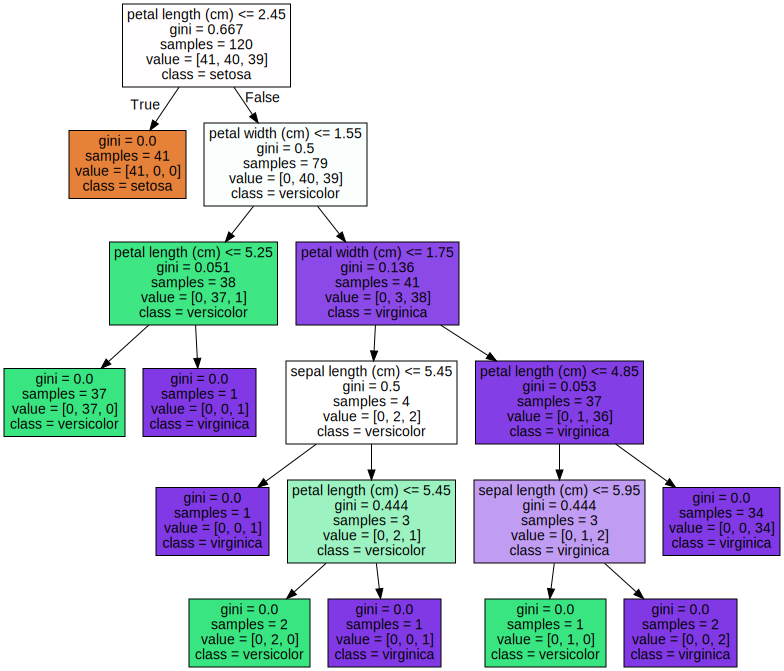

In [4]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화.
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

리프 노드: 더 이상 자식 노드가 없는 노드. 최종 클래스 값이 결정되는 노드. - 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족해야 함.

브랜치 노드: 자식 노드가 있는 노드. 자식 노드를 만들기 위한 분할 규칙 조건을 가짐.
- 피처의 조건이 있는 것: 자식 노드를 만들기 위한 규칙 조건. 조건이 없을 시 리프 노드.
- gini: value=[]로 주어진 데이터 분포에서의 지니 계수.
- samples: 현 규칙에 해당하는 데이터 건수.
- value=[]: 클래스 값 기반의 데이터 건수.

feature_importances_: ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨. 값이 높을수록 해당 피처의 중요도가 높음.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

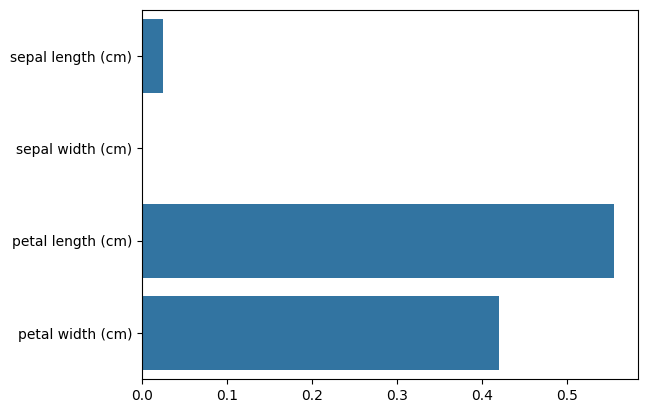

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

## 결정 트리 과적합(Overfitting)

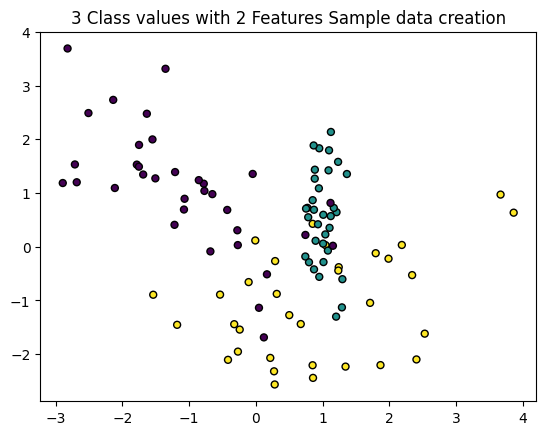

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features,y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2,n_classes=3,n_clusters_per_class=1,random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolors='k')

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

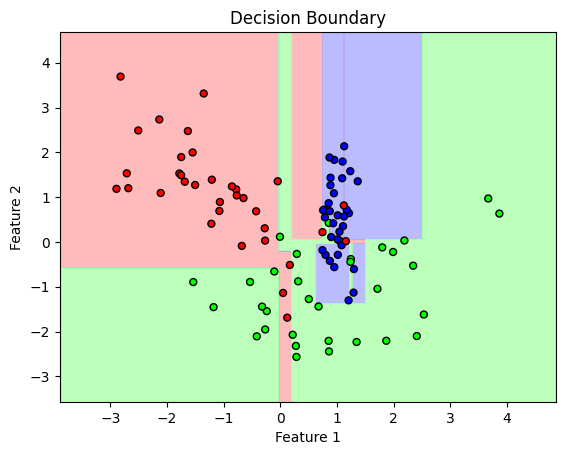

In [11]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

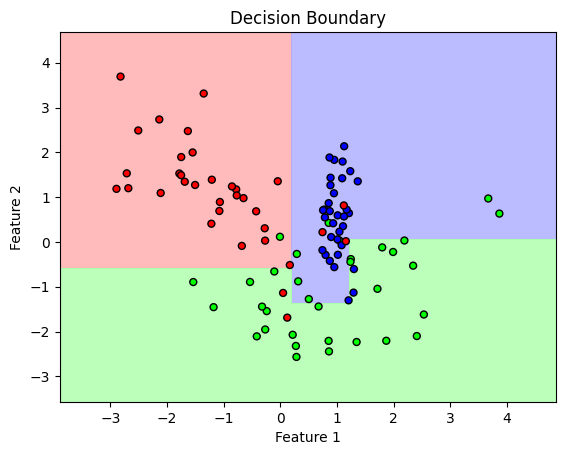

In [12]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화.
dt_clf=DecisionTreeClassifier(min_samples_leaf=6,random_state=156).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

## 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/features.txt",sep='\s+',
                            header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출.
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [16]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [20]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df,how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0],axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [21]:
import pandas as pd

def get_human_dataset():
  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/features.txt",sep='\s+',
                            header=None,names=['column_index','column_name'])
  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
  new_feature_name_df=get_new_feature_name_df(feature_name_df)
  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환.
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()
  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용.
  X_train=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/train/X_train.txt",sep='\s+',
                      header=None,names=feature_name)
  X_test=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/test/X_test.txt",sep='\s+',
                      header=None,names=feature_name)
  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여.
  y_train=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/train/y_train.txt",sep='\s+',
                      header=None,names=['action'])
  y_test=pd.read_csv("/content/drive/My Drive/Colab/ESAA/human_activity/test/y_test.txt",sep='\s+',
                      header=None,names=['action'])
  # 로드된 학습/테스트용 DataFrame을 모두 반환.
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=get_human_dataset()

In [22]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [26]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정.
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n',dt_clf.get_params())

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [30]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[6,8,10,12,16,20,24],
    'min_samples_split':[16]
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [33]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


In [34]:
max_depths=[6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf=DecisionTreeClassifier(max_depth=depth,random_state=156)
  dt_clf.fit(X_train,y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth={0} 정확도:{1:.4f}'.format(depth,accuracy))

max_depth=6 정확도:0.8558
max_depth=8 정확도:0.8707
max_depth=10 정확도:0.8673
max_depth=12 정확도:0.8646
max_depth=16 정확도:0.8575
max_depth=20 정확도:0.8548
max_depth=24 정확도:0.8548


In [35]:
params={
   'max_depth':[8,12,16,20],
   'min_samples_split':[16,24]
}

grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [37]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


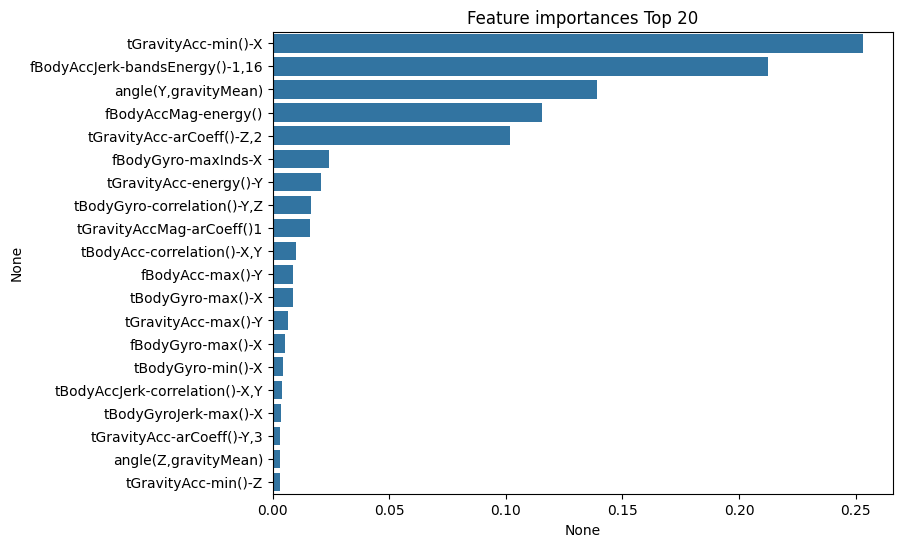

In [38]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환.
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
# 중요도값 순으로 Series를 정렬.
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()